# Ejercicio 12 examen
## Emiliano Valderrama del Toro

### Construcción de un portafolio eficiente con simulación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [24]:
def get_data(stocks, start, end):
    ## descarga datos
    prices = yf.download(stocks, start, end, progress=False)['Close']
    returns = prices.pct_change()
    mean_returns = returns.mean()
    matriz_cov = returns.cov()
    return mean_returns, matriz_cov, prices

In [25]:
stocks = ['MCD', 'COST', 'MSFT']

mean_returns, matriz_cov, prices = get_data(stocks, dt.datetime.now() - dt.timedelta( days=365 * 4), dt.datetime.now())

returns = prices.pct_change().dropna()
returns.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4700\900847920.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress=False)['Close']


Ticker,COST,MCD,MSFT
Date,,,
2021-10-08,-0.002252,-0.002497,0.000000
2021-10-11,-0.004758,-0.004522,-0.002103
2021-10-12,-0.006293,-0.008354,-0.004589
2021-10-13,-0.003513,-0.007648,0.011711
2021-10-14,0.012037,0.007830,0.021734


In [26]:
print(mean_returns)

print("")

print(matriz_cov)

Ticker
COST    0.000863
MCD     0.000344
MSFT    0.000738
dtype: float64

Ticker      COST       MCD      MSFT
Ticker                              
COST    0.000222  0.000058  0.000121
MCD     0.000058  0.000122  0.000049
MSFT    0.000121  0.000049  0.000288


In [29]:
N_port= 10000
rf = 0.04
cov= returns.cov()
cov_an = cov * 252

# Simulación de portafolios
num_assets = len(returns.columns)
results = np.zeros((N_port, 3 + num_assets))

for i in range(N_port):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_return = np.dot(weights, mean_returns)
    port_variance = np.dot(weights.T, np.dot(cov_an, weights))
    port_std = np.sqrt(port_variance)
    sharpe = (port_return - rf) / port_std
    results[i, 0] = port_return
    results[i, 1] = port_std
    results[i, 2] = sharpe
    results[i, 3:] = weights


Portafolio de menor riesgo:
Return    0.0005
Risk      0.1577
Sharpe   -0.2505
W_COST    0.1979
W_MCD     0.6545
W_MSFT    0.1476
Name: 7193, dtype: float64

Portafolio de mayor rendimiento:
Return    0.0009
Risk      0.2356
Sharpe   -0.1661
W_COST    0.9940
W_MCD     0.0032
W_MSFT    0.0028
Name: 2104, dtype: float64

Portafolio de mayor Sharpe:
Return    0.0007
Risk      0.2663
Sharpe   -0.1474
W_COST    0.0086
W_MCD     0.0069
W_MSFT    0.9845
Name: 3390, dtype: float64


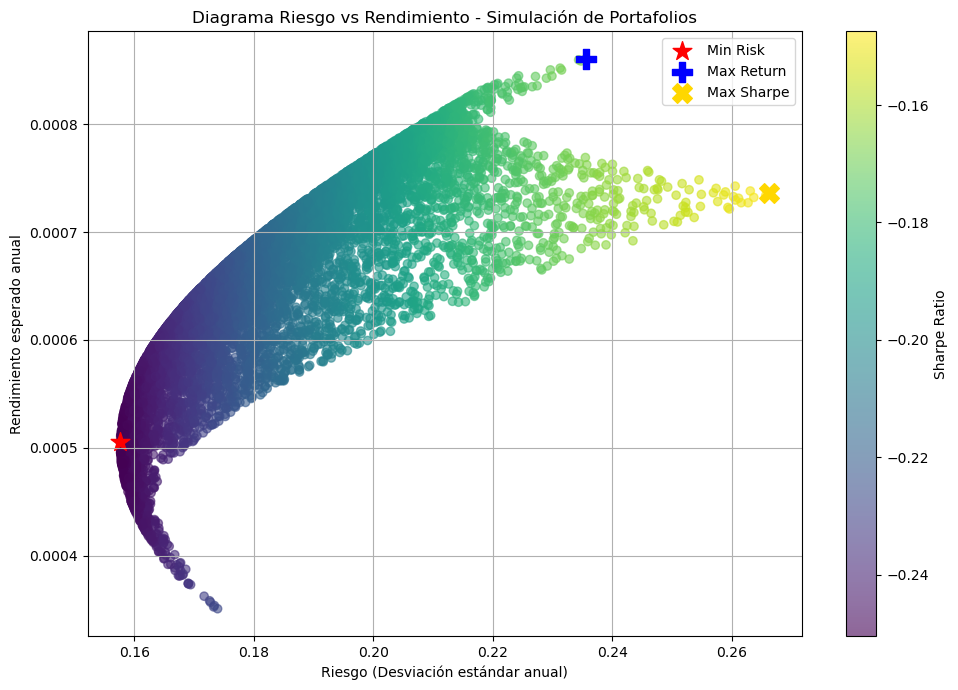

In [30]:
# Convertir a DataFrame
cols = ['Return', 'Risk', 'Sharpe'] + [f'W_{t}' for t in returns.columns]
results_df = pd.DataFrame(results, columns=cols)


# Identificar portafolios importantes
min_risk_idx = results_df['Risk'].idxmin()
max_return_idx = results_df['Return'].idxmax()
max_sharpe_idx = results_df['Sharpe'].idxmax()


min_risk = results_df.loc[min_risk_idx]
max_return = results_df.loc[max_return_idx]
max_sharpe = results_df.loc[max_sharpe_idx]


print('\nPortafolio de menor riesgo:')
print(min_risk.round(4))
print('\nPortafolio de mayor rendimiento:')
print(max_return.round(4))
print('\nPortafolio de mayor Sharpe:')
print(max_sharpe.round(4))


# Gráfica riesgo-rendimiento
plt.figure(figsize=(10, 7))
scatter = plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sharpe Ratio')


# Marcar puntos especiales
plt.scatter(min_risk['Risk'], min_risk['Return'], marker='*', color='red', s=200, label='Min Risk')
plt.scatter(max_return['Risk'], max_return['Return'], marker='P', color='blue', s=200, label='Max Return')
plt.scatter(max_sharpe['Risk'], max_sharpe['Return'], marker='X', color='gold', s=200, label='Max Sharpe')


plt.title('Diagrama Riesgo vs Rendimiento - Simulación de Portafolios')
plt.xlabel('Riesgo (Desviación estándar anual)')
plt.ylabel('Rendimiento esperado anual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('riesgo_rendimiento_portafolios.png', dpi=300)
plt.show()